# AE
- MVTechADの論文に従って１万枚にデータ拡張
- 100エポック学習

In [1]:
import sys
import glob
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [3]:
result_dir = "./dc_img/16"
dirlist = sorted(glob.glob(os.path.join(result_dir, "*")))
classnames = sorted(list(set([os.path.basename(d).split('_')[1] for d in dirlist])))
classnames = [c if c!='metal' else 'metal_nut' for c in classnames]
print(classnames)

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']


In [4]:
%%html
<style>
div.input {
    display:none;
}
</style>

## AUCの最大値
それぞれの試行での最大値の平均

In [5]:
print("classname\tnumber of samples / seed0, seed1, seed2 ...., avg")
for c in classnames:
    print("{:<15}".format(c), end=' ')
    eachclass_results = glob.glob(os.path.join(result_dir, "MSE_{c}_128_MSELOSS_digest_10time*".format(c=c)))
    avg = 0
    l = len(eachclass_results)
    print(l, end=' / ')
    for directory in eachclass_results:
        plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
        with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
            maxauc = np.max(plots_auc["val"][1][:100]) # 100エポックで打ち切り
            # maxauc = np.max(plots_auc["val"][1])
            avg += maxauc
            print("{:.3f}".format(maxauc), end=' ')
    if l != 0:
        avg /= l
        print("\t\t\t\t\tavg={:.2f}".format(avg))
    else:
        print("")

classname	number of samples / seed0, seed1, seed2 ...., avg
bottle          7 / 0.973 0.960 0.952 0.961 0.936 0.973 0.952 					avg=0.96
cable           4 / 0.810 0.810 0.795 0.816 					avg=0.81
capsule         3 / 0.685 0.667 0.639 					avg=0.66
carpet          8 / 0.917 0.932 0.908 0.928 0.890 0.942 0.929 0.936 					avg=0.92
grid            6 / 0.818 0.801 0.814 0.809 0.831 0.852 					avg=0.82
hazelnut        8 / 0.979 0.979 0.949 0.979 0.980 0.972 0.985 0.978 					avg=0.98
leather         6 / 0.829 0.821 0.832 0.769 0.785 0.843 					avg=0.81
metal_nut       6 / 0.594 0.643 0.579 0.598 0.566 0.560 					avg=0.59
pill            8 / 0.787 0.702 0.698 0.742 0.709 0.762 0.607 0.777 					avg=0.72
screw           8 / 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 					avg=1.00
tile            7 / 0.733 0.746 0.733 0.731 0.741 0.730 0.734 					avg=0.74
toothbrush      5 / 0.967 0.919 0.983 0.986 0.978 					avg=0.97
transistor      9 / 0.803 0.816 0.807 0.747 0.800 0.804 0.811 0.745 0.782 		

In [6]:
## AUCの最終値 (300エポック)

In [7]:
# for directory in dirlist:
#     print("{:<15}".format(directory.split('/')[-1][4:-38]), end=' ')
#     plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
#     with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
#         print("{:.2f}".format(plots_auc["val"][1][-1]))

In [8]:
## AUCの最大値と最終値(300epoch)の比較

In [9]:
# print("{:<15}\t{}\t{}".format("label", "max", "last"))
# for directory in dirlist:
#     print("{:<15}".format(directory.split('/')[-1][4:-38]), end=' ')
#     plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
#     with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
#         print("{:.2f}".format(np.max(plots_auc["val"][1])), end='\t')
#         print("{:.2f}".format(plots_auc["val"][1][-1]))

In [10]:
# ## ScrewのAUCのグラフ
# - 横軸 : epoch
# - 縦軸 : AUC

# AEの学習がうまくいっておらず初期値の方が良い例

In [11]:
def plot_graph(screw_dir):
    plots_auc_name = os.path.join(screw_dir, '0000_plots_auc.pcl')
    with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
    plt.rcParams['figure.figsize'] = (5.0, 5.0)
    plt.figure()
    plt.title('Screw')
    plt.plot(plots_auc["val"][1])

In [12]:
def plot_class(c):
    screw_dirs = glob.glob(os.path.join(result_dir, "*"+c+"*"))
    interact(plot_graph, screw_dir=screw_dirs)

In [13]:
# interact(plot_class, c=classnames)

In [14]:
# ## BottleのAUCのグラフ
# - 横軸 : epoch
# - 縦軸 : AUC

# 最終値のAUCで問題なさそうな例

In [15]:
# screw_dir = glob.glob(os.path.join(result_dir, "*bottle*"))[0]
# plots_auc_name = os.path.join(screw_dir, '0000_plots_auc.pcl')
# with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
# plt.rcParams['figure.figsize'] = (5.0, 5.0)
# plt.figure()
# plt.title('bottle')
# plt.plot(plots_auc["val"][1])

In [16]:
def loadfile(filename):
    with open(filename, 'rb') as f:
        tmp = pickle.load(f)

## AEの平均途中経過
それぞれの平均の最大値

bottle 5


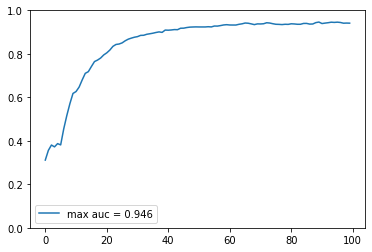

cable 4


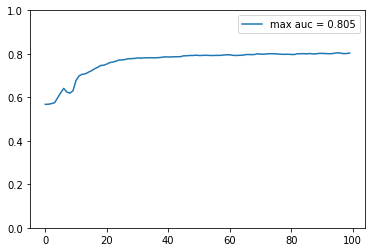

capsule 3


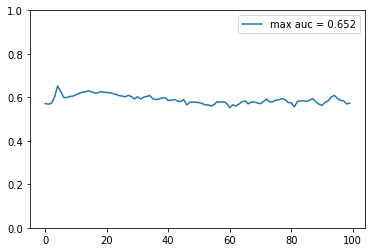

carpet 5


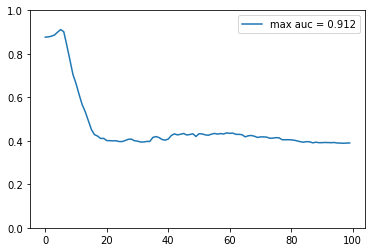

grid 5


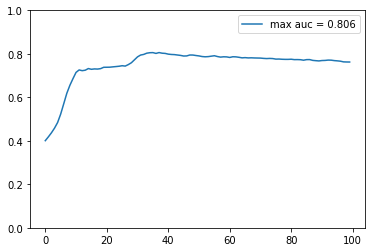

hazelnut 5


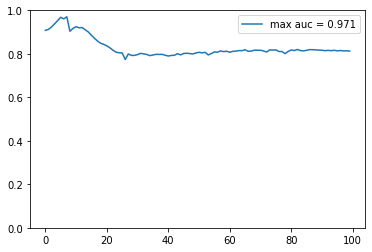

leather 5


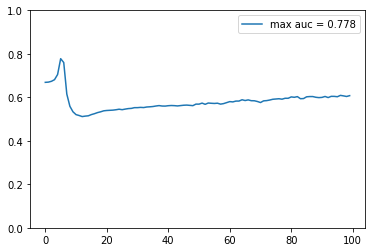

metal_nut 5


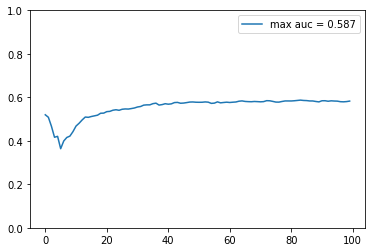

pill 5


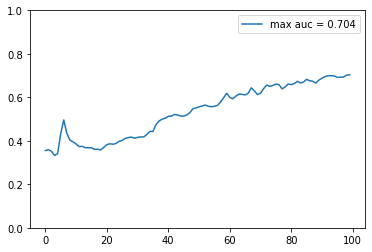

screw 5


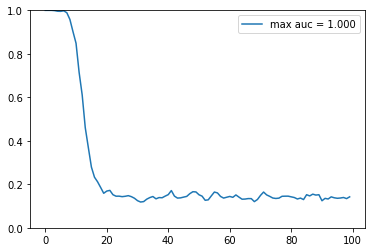

tile 5


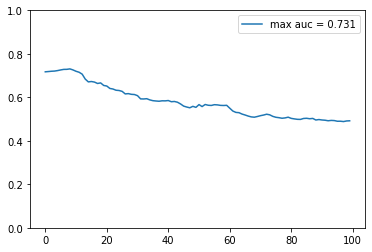

toothbrush 5


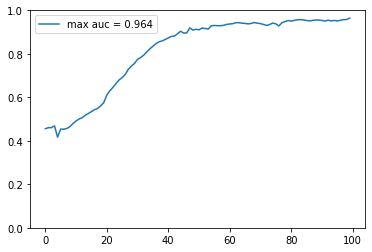

transistor 5


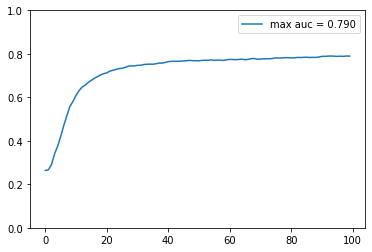

wood 5


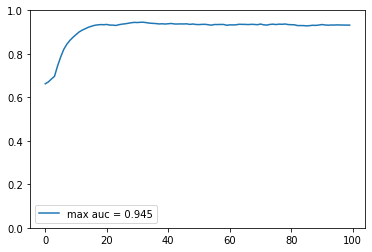

zipper 5


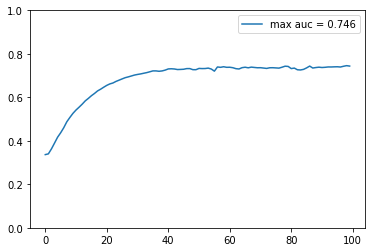

In [17]:
for c in classnames:
    eachclass_results = glob.glob(os.path.join(result_dir, "MSE_{c}_128_MSELOSS_digest_10time*".format(c=c)))[:5]
    avg = 0
    l = len(eachclass_results)
    print(c, l)
    plots = []
    for directory in eachclass_results:
        plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
        with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
            v = plots_auc["val"][1][:100] # 100エポックで打ち切り
            plots.append(v)
    m = np.mean(plots, axis=0)
    plt.ylim(0, 1)
    plt.plot(m, label="max auc = {:.3f}".format(np.max(m)))
    plt.legend()
    plt.show()